# Software Developer Foundations Hackathon Problem:

# What Happened on the Day that you were Born?

Python contructs we'll use in this Colab:
- Public API data ingest.
- Retrieve JSON data from the API for a _month_ and _year_.
- Filter the data for a specific _day of the month_.
- Use pandas to manipulate the data.
- Create a CSV of data.


## Description of the Coding Exercise
- We will query the **New York Times Archive API** for all the articles the Times has accessible from the API from your _BIRTH MONTH_ and _BIRTH YEAR_.
 - You can signup for an API Key at the [NY Times API Main Site](https://developer.nytimes.com/). 
  - Or you can use `kEBQsEG9EGEfQNutEqFNXBSq6m7etGAk`.
 - Start by reviewing the webpage here: [NY Times Archive API](https://developer.nytimes.com/docs/archive-product/1/overview).
 - Study the `Example Call` of the `Archive` API endpoint.
 - Be sure you **TEST** your code following every step.
 - Ask questions.
- **INPUT**: Ask the user for their birth month and year to query the NY Times Archive API.

## Helpful Steps
- After you understand how to invoke the endpoint, use the _Firefox_ browser to help you understand the structure of the API data by making a sample API call in the browser location bar.
- Instead of asking the user to input data, you might first _hardcode_ a birth month and birth year.



# Obtaining the Data that you want by Querying the API

- You will obtain JSON data from the Archive API
 - Construct a URL to pass to the API.  If you're not sure of the format, then go back and study the Archive API examples as suggested above.
 - This code can help you:

 ```
 # Construct the URL
month_url = month+".json"
url_parts = (base_url,year,month_url)
url = "/".join(url_parts)
print(url)
```
- You should be able to print out a statement like the following after you retrieve the data:
 - `There are 17432 articles in month 12 of 1991.`



In [1]:
import requests
import csv

# Setup the querystring

# Call request and convert the JSON data to a Python dict

# Get the response data

# Print out the "hits" key to show the number of articles that were returned
# by the NY Times Archive API
#https://api.nytimes.com/svc/archive/v1/1995/7.json?api-key=zzoGRlEel2CI5d4nwRG4V9wfNH7qA0QB

def ArticleNumber(month, year):
  apikey = "zzoGRlEel2CI5d4nwRG4V9wfNH7qA0QB"
  base_url = "https://api.nytimes.com/svc/archive/v1/"
  month_url = month + ".json"
  url_parts = (base_url,year,month_url)
  url = "/".join(url_parts)
  #construct url
  querystring = {"api-key":apikey}
  response = requests.request("GET", url, params=querystring)
  json_as_dict = response.json()
  
  numberArt = json_as_dict["response"]
  numberArt = numberArt["meta"]
  numberArt = numberArt["hits"]
  return(numberArt)

  #count articles
  #number = 0
  #for item in numberArt["docs"]:
  #  number += 1
  #return(number)

#DATE
month = str(input("Enter your birthmonth 1-12: "))
year = str(input("Enter your birthyear YYYY: "))

#get the number
articles = ArticleNumber(month, year)

#return string
print(f"There are {articles} articles in month {month} of {year}.")

Enter your birthmonth 1-12: 7
Enter your birthyear YYYY: 1995
There are 11259 articles in month 7 of 1995.


# Filter the data for our **date of birth**.

We only want to consider the articles that were returned by the API for a single **day** in the _month/year_ of our birth.

- Retrieve the `articles` from `response_dict`.  What key are they in?
- Assign a string variable called `dob` your birth date in this format: `"yyyy-mm-dd"`.
- Create a List variable called `dobArticles` that will store all the specific articles from all the `articles` returned by the API that are on YOUR BIRTHDATE.
- Walk through the `articles` list and query the `pub_date` key in the JSON
 - How do you get to that field?
 - Notice that the data is in the form: `"1991-12-05T05:00:00+0000"`
 - We only need the string PRIOR to the `T`, so we can use a `str.split('T')` call on SOME string `str`.  What string do we need to "split"?
 - Compare your `dob` to the appropriate part of the `split string`.
  - If there's a match, then `append` that dictionary to the `dobArticles` list.
- This cell should display something like this:
 - `There are 598 articles in the NY Times Archive published on your bday.`

In [2]:
# Grab all the articles from the response_dict.
# What key do you need to index?

# Put your birthdate in this format
# yyyy-mm-dd
# Assign that STRING to variable called dob
# Create your date of birth list

# Walk through the articles list
# Access the "pub_date" key and split that string on 'T'
# Note that a tuple is returned by split.  
# You only need the first part
# If the first part of pub_date matches dob, then append to dobArticles


# Print out the number of articles published on your birthday

import requests
import csv
#"pub_date":"1995-07-01T05:00:00+0000"

def ArticleNumberDays(date):
  dobArticles = []
  apikey = "zzoGRlEel2CI5d4nwRG4V9wfNH7qA0QB"
  base_url = "https://api.nytimes.com/svc/archive/v1/"
  birthday = date.split("-")
  birthday[1] = int(birthday[1])
  birthday[1] = str(birthday[1])
  month_url = birthday[1] + ".json"
  year = birthday[0]
  url_parts = (base_url,year,month_url)
  url = "/".join(url_parts)
  #construct url
  querystring = {"api-key":apikey}
  response = requests.request("GET", url, params=querystring)
  json_as_dict = response.json()
  
  number = 0
  numberArt = json_as_dict["response"]
  numberArt = numberArt["docs"]
  for item in numberArt:
    pub_date = item["pub_date"]
    pub_date_split = pub_date.split("T")
    pub_date_string = pub_date_split[0]
    pub_date = pub_date_string.split("-")
    if pub_date[2] == birthday[2]:
      number += 1
      dobArticles.append(item)
  return(number)

#DATE
date = input("Enter your birthday (yyyy-mm-dd): ")


birthdayArticles = ArticleNumberDays(date)

print(f"There were {birthdayArticles} articles published on your birthday.")





Enter your birthday (yyyy-mm-dd): 1995-07-31
There were 342 articles published on your birthday.


## Let's move to `pandas` so that we can more easily manipulate the data

- `import pandas as pd`
- Create a DataFrame called `articles_df` and read the `dobArticles` list into it.
 - `dobarticles_df = pd.DataFrame(dobArticles)`
- Use `head()` to display the first 5 lines of this DataFrame
- How do you display 3 articles like, say, 100-102?

In [3]:
import pandas as pd
# Grab all the articles from the response_dict.
# What key do you need to index?

# Put your birthdate in this format
# yyyy-mm-dd
# Assign that STRING to variable called dob
# Create your date of birth list

# Walk through the articles list
# Access the "pub_date" key and split that string on 'T'
# Note that a tuple is returned by split.  
# You only need the first part
# If the first part of pub_date matches dob, then append to dobArticles


# Print out the number of articles published on your birthday

import requests
import csv
#"pub_date":"1995-07-01T05:00:00+0000"

def ArticleNumberDays(date):
  Articles = []
  apikey = "zzoGRlEel2CI5d4nwRG4V9wfNH7qA0QB"
  base_url = "https://api.nytimes.com/svc/archive/v1/"
  birthday = date.split("-")
  birthday[1] = int(birthday[1])
  birthday[1] = str(birthday[1])
  month_url = birthday[1] + ".json"
  year = birthday[0]
  url_parts = (base_url,year,month_url)
  url = "/".join(url_parts)
  #construct url
  querystring = {"api-key":apikey}
  response = requests.request("GET", url, params=querystring)
  json_as_dict = response.json()
  
  number = 0
  numberArt = json_as_dict["response"]
  numberArt = numberArt["docs"]
  for item in numberArt:
    pub_date = item["pub_date"]
    pub_date_split = pub_date.split("T")
    pub_date_string = pub_date_split[0]
    pub_date = pub_date_string.split("-")
    if pub_date[2] == birthday[2]:
      Articles.append(item)
  return(Articles)

#DATE
date = input("Enter your birthday (yyyy-mm-dd): ")


dobArticles = ArticleNumberDays(date)

number = 0
for item in dobArticles:
  number += 1


print(f"There were {number} articles published on your birthday.")







dobarticles_df = pd.DataFrame(dobArticles)

#dobarticles_df.head(5)

df_range = dobarticles_df.iloc[100:103]

df_range



Enter your birthday (yyyy-mm-dd): 1995-07-31
There were 342 articles published on your birthday.


,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
100,"As expected, four players from the original ...",https://www.nytimes.com/1995/07/31/sports/drea...,,"As expected, four players from the original Dr...",C,7,The New York Times,[],"{'main': 'Dream Teamers Back for 1996', 'kicke...","[{'name': 'persons', 'value': 'Hill, Grant', '...",1995-07-31T05:00:00+0000,article,Sports Desk,Sports,"{'original': None, 'person': [], 'organization...",News,nyt://article/97c1aa32-8abc-537b-b1de-a205a7bd...,130,nyt://article/97c1aa32-8abc-537b-b1de-a205a7bd...,NaN
101,"Starting tomorrow, New York will become the ...",https://www.nytimes.com/1995/07/31/nyregion/pe...,,"Starting tomorrow, New York will become the 46...",B,5,The New York Times,[],{'main': 'Pedal to the Metal: The Speed Limit ...,"[{'name': 'subject', 'value': 'TERMS NOT AVAIL...",1995-07-31T05:00:00+0000,article,Metropolitan Desk,New York,"{'original': 'By Douglas Martin', 'person': [{...",News,nyt://article/9967fbd2-d010-5523-89c8-085ae9a2...,802,nyt://article/9967fbd2-d010-5523-89c8-085ae9a2...,NaN
102,"Dr. Harry M. Zimmerman, a pioneer in the stu...",https://www.nytimes.com/1995/07/31/obituaries/...,,"Dr. Harry M. Zimmerman, a pioneer in the study...",B,7,The New York Times,[],"{'main': 'Dr. Harry Zimmerman, 93, Dies; Found...","[{'name': 'organizations', 'value': 'Einstein,...",1995-07-31T05:00:00+0000,article,Obituary,Obituaries,"{'original': 'By Robert Mcg. Thomas Jr', 'pers...",Obituary; Biography,nyt://article/9b8c798b-35ee-5502-9e17-0e1079b0...,647,nyt://article/9b8c798b-35ee-5502-9e17-0e1079b0...,NaN


## Let's find the articles that were on the Front Page of the NY Times.

### How many articles are there on the front page?
- What **column** do you need to look at?  What value?
- Create another DataFrame called `frontpage_df` that chooses ONLY rows from the front page.
 - How do you know that the article appears on the front page?
 - What column are you looking for?  What value?
- Use `shape` to determine the number of articles that appeared on the front page of the NY Times on your birthday. Display that value with print.

In [4]:
# Create the frontpage_df DataFrame from dobarticles_df

# Display the number of articles on the front page
frontPage = dobarticles_df[dobarticles_df['print_page'] == "1"]

frontPage.shape

(56, 20)

## Display the resulting `frontpage_df` DataFrame

- Use `iloc` to display 5 articles from the `frontpage_df` DataFrame.  Eg. The 5th through 9th.
- Display the entire `frontpage_df` DataFrame

In [5]:
newIndex = frontPage.reset_index(drop=True)

newIndex.iloc[5:10]

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
5,It is not a lunar landing or the cure for di...,https://www.nytimes.com/1995/07/31/business/so...,,It is not a lunar landing or the cure for dise...,A,1,The New York Times,[],"{'main': 'Software Hype and Hopes', 'kicker': ...","[{'name': 'subject', 'value': 'NO INDEX TERMS'...",1995-07-31T05:00:00+0000,article,Business/Financial Desk,Business Day,"{'original': None, 'person': [], 'organization...",Summary,nyt://article/27834031-b7ce-553b-bb8a-b34a538f...,134,nyt://article/27834031-b7ce-553b-bb8a-b34a538f...,NaN
6,The State Board of Education will vote on We...,https://www.nytimes.com/1995/07/31/nyregion/ne...,,The State Board of Education will vote on Wedn...,B,1,The New York Times,[],"{'main': 'Board to Vote on School's Status', '...","[{'name': 'glocations', 'value': 'Union City (...",1995-07-31T05:00:00+0000,article,Metropolitan Desk,New York,"{'original': 'By Terry Pristin', 'person': [{'...",News,nyt://article/2a12a56b-2b83-59a2-ba91-d2a008a8...,118,nyt://article/2a12a56b-2b83-59a2-ba91-d2a008a8...,NaN
7,"NEW RULE Starting tomorrow, motorists on New...",https://www.nytimes.com/1995/07/31/nyregion/pu...,,"NEW RULE Starting tomorrow, motorists on New Y...",B,1,The New York Times,[],"{'main': 'New Speed Limits', 'kicker': 'PULSE'...","[{'name': 'glocations', 'value': 'New York Sta...",1995-07-31T05:00:00+0000,article,Metropolitan Desk,New York,"{'original': None, 'person': [], 'organization...",News,nyt://article/32c2ac1e-8f65-59be-8e89-642db919...,180,nyt://article/32c2ac1e-8f65-59be-8e89-642db919...,NaN
8,In a 15-minute videotape that tomb robbers i...,https://www.nytimes.com/1995/07/31/us/art-for-...,,In a 15-minute videotape that tomb robbers in ...,A,1,The New York Times,[],{'main': 'Art for Whose Sake?: Trading in Anti...,"[{'name': 'glocations', 'value': 'Mexico', 'ra...",1995-07-31T05:00:00+0000,article,National Desk,U.S.,"{'original': 'By William H. Honan', 'person': ...",News,nyt://article/3bd6e9be-5bdd-5010-a806-2142171b...,2538,nyt://article/3bd6e9be-5bdd-5010-a806-2142171b...,NaN
9,Metal fatigue probably caused the calamitous...,https://www.nytimes.com/1995/07/31/nyregion/me...,,Metal fatigue probably caused the calamitous f...,B,1,The New York Times,[],{'main': 'Metal Fatigue Is Suspected In Ride W...,"[{'name': 'glocations', 'value': 'New York Cit...",1995-07-31T05:00:00+0000,article,Metropolitan Desk,New York,"{'original': 'By Richard Perez-Pena', 'person'...",News,nyt://article/45373d3f-501b-5e61-9b9e-5a2a94c3...,985,nyt://article/45373d3f-501b-5e61-9b9e-5a2a94c3...,NaN


## Make a list of the Print Headlines from the articles on the front page.

- Look at the original JSON returned to the Firefox Browser earlier.
 - Look at the `headline` key.
- Using `frontpage_df`, assign only the `"headline"` column to a variable called `headlines`.
 - Look at the first element of `headlines` using `iloc`.
 - The `headlines` variable is called a **`Series`**.  It's very much like a list but it's NOT a list.  Yet.
 - There's a function called `to_list()`.  Use that to convert `headlines` to a list:  `headlinesList = headlines.to_list()`.
 - Use Colab to verify that you do, indeed, have a list by hovering over the `headlinesList` variable.
 - What kind of list do you have?
 - Display the first line of the list.
- Let's make our list of the Print Headlines.
 - Create a List variable called `printHeadlines`.
 - How do you populate this list with the `print_headline` strings from the front page headlines?
 - Display the resulting `printHeadlines` list using a `for` loop.


In [6]:
# Make a list of the print headlines from the articles on the front page.
headlines = frontPage["headline"]
#headlines.iloc[1]

headlinesList = headlines.to_list()

printHeadlines = []
for item in headlinesList:
  printHeadlines.append(item['print_headline'])
  
# Access the appropriate column from the frontpage_df DataFrame

# Check headlines.iloc[0]

# Use to_list() to force the `headlines` variable to be a list

# Append the print_headline string to the printHeadlines list.

# Print out printHeadlines
for i in printHeadlines:
  print(i)
  print()

NEW JERSEY DAILY BRIEFING; Gypsy Moth Is a Threat, Again

BASEBALL; Yanks Surpass .500 With a Little Help From Twins' Defense

BASEBALL; Isringhausen's Triumph Brightens Mets' Future

Christopher Links Summit Talks To China's Release of American

MICROSOFT'S MOBILIZATION: OVERVIEW; Windows of Opportunity for Microsoft

Software Hype and Hopes

NEW JERSEY DAILY BRIEFING; Board to Vote on School's Status

PULSE; New Speed Limits

Art for Whose Sake?: Trading in Antiquities; Rare Pre-Columbian Relics, at Any Cost

Metal Fatigue Is Suspected In Ride Wreck

NEW JERSEY DAILY BRIEFING; 4 Are Hurt in Hotel Fire

NEW JERSEY DAILY BRIEFING; Sex Offender Is Arrested Again

NEW JERSEY DAILY BRIEFING; A Program to Help Rape Victims

On L.I., the Cocktails Mix Business, Politics and Pleasure

Discord Rattles Co-op City Towers; Feuds and Finances Threaten Stability of Middle-Class Refuge

CROATS CONFIDENT AS BATTLE LOOMS OVER SERBIAN AREA

To Help Keep Mexico Stable, U.S. Soft-Pedaled Drug War

Queen

### Let's create a CSV of the front page articles.

- This time you will use a `pandas` function to create the CSV
 - Create a string variable called `frontpage_birthdate` that uses the `dob` variable from above to create a meaningful CSV file name using string concatenation like: `"nytimes"+dob+"frontpage.csv"`
 - `frontpage_df.to_csv(myfilename)`
Download the CSV that you just created and open it in Microsoft Excel.



In [7]:
# Create a frontpage_birthdate filename

frontpage_birthdate = "nytimes"+ date +"frontpage.csv"

print(date)


with open(frontpage_birthdate, mode='w') as csvfile:
  newIndex.to_csv(frontpage_birthdate)

print("Complete!")

# Create a CSV from frontpage_df
# One line of code!


1995-07-31
Complete!


## Download and open that file in Microsoft Excel.

- Use the list of `Print Headlines` that you generated above to identify an article that interests you.
- Use the URL in the `web_url` column and copy/paste that into a Web browser.
- Look for an article that allows you to "VIEW ON TIMESMACHINE".
- Is there some type of **Index** on the front page that you are viewing?
 - If so, identify the pages of a _Section_ that interests you.

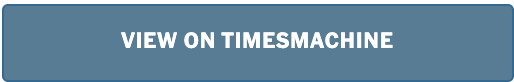

In [ ]:
# I KEEP GETTING THE FOLLOWING MESSAGE:
#New York Times subscribers* enjoy full access to TimesMachine—view
#over 150 years of New York Times journalism, as it originally appeared.

## Display the rows from TWO pages from that section.

- Create another DataFrame called `section_df` with only rows from the `print_page` that you identified above.
 - Use something like this to select the appropriate rows from `dobarticles_df`.
   - `dobarticles_df["print_page"].isin(["22","23"])`
- How many articles are in `section_df`?

In [9]:
section_df = dobarticles_df[dobarticles_df["print_page"].isin(["3","4"])]
print(f"There are {len(section_df)} articles on pages 3 and 4")

There are 28 articles on pages 3 and 4


## Let's search all articles containing an interesting keyword of your choice that appears in the _main headline_.  

The **desired goal**:
- Display the _main headline_ of all articles in the dataset `dobarticles_df` where `myKeyword` appears.
- List the URLs of all these articles.

Steps:
- Hardcode a variable `myKeyword` with a string of your choice - the word that you want to search all articles for.
- Create a list `urlList = []`
- Create a counter `i = 0`.
- Use a `for` loop to walk through the `headline` column of the dataframe
 - `dobarticles_df.headline`
 - Store the `main` key in a variable called `mainheadline`.  Since that's a string, you should use the `lower()` function to normalize the string data.
 - `if keyword in mainheadline`, then do the following:
   - Print out `mainheadline`.
   - Append the associated URL in the `web_url` key to `urlList`:
    - `dobarticles_df.iloc[i].web_url`
 - Be sure that you increment the counter inside the `for` loop but outside the `if` statement.  This counter is ensuring that you are tracking the row in the DataFrame where you query the `mainheadline` for the `keyword`.


In [18]:
# Create variables:  keyword, urlList, counter
myKeyword = "art"
url_list = []
counter = 0

# Walk through dobarticles_df.headline
for item in dobarticles_df.headline:
  # Select the 'main' key and store in mainheadline variable
  mainheadline = item['main'].lower()
  # Check if your keyword is in the returned string
  # If so, the print mainheadline and append the URL to urlList.
  if myKeyword in mainheadline:
    print(item['main'])
    url_list.append(dobarticles_df.iloc[counter].web_url)
  counter += 1


# Print out the list of URLs
print()
print(f"URLs with {myKeyword}.")
for url in url_list:
  print(url)








Les Elgart, 77, Dies; Led a Dance Band
On a Sticky Night, Mozart, Cooling Brow and Brain
Art for Whose Sake?: Trading in Antiquities; Rare Pre-Columbian Relics, at Any Cost
Article 012295 -- No Title
In D'Amato Book, Dodging Is Artful
Different Departures For Bagwell And Kruk
A Helicopter Quartet. What Else?
Forget the Tutor: Jets' Dixon Steps Into a Starting Role
Partition of Bosnia Would Reinforce Injustices; What of Serb Victims?
SENATE COMMITTEE STARTS RESHAPING HOUSE BUDGET BILL
Russians and Chechens Sign Partial Accord
Partition of Bosnia Would Reinforce Injustices
Les Elgart, 77, Dies; Led a Dance Band
On a Sticky Night, Mozart, Cooling Brow and Brain
Art for Whose Sake?: Trading in Antiquities; Rare Pre-Columbian Relics, at Any Cost
Article 012295 -- No Title
In D'Amato Book, Dodging Is Artful
Different Departures For Bagwell And Kruk
A Helicopter Quartet. What Else?
Forget the Tutor: Jets' Dixon Steps Into a Starting Role
Partition of Bosnia Would Reinforce Injustices; What of

## Have some fun investigating the articles that are associated with the returned URLS!

- Just paste those URLs into your browser and enjoy finding out what happened the day that you were born!